In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import numpy as np
from collections import Counter
import networkx as nx
from scipy.stats import linregress

In [3]:
p = 0.3

class GraphModel:
  def __init__(self):
    self.graph = list()
    self.nx_graph = nx.Graph()
    self.init_graph()

  def init_graph(self):
    self.graph.append(set())
    self.graph.append(set())
    self.graph.append(set())
    self.nx_graph.add_edge(0, 1)
    self.nx_graph.add_edge(1, 2)

  def get_graph(self):
    return self.graph

  def get_node_count(self):
    return len(self.graph)

  def add_node(self):
    self.graph.append(set())
    return len(self.graph) - 1

  def add_edge(self, vertex1, vertex2):
    if vertex1 != vertex2:
      self.graph[vertex1].add(vertex2)
      self.graph[vertex2].add(vertex1)
      self.nx_graph.add_edge(vertex1, vertex2)

  def add_new_node_by_model(self):
    new_node = self.add_node()

    intermediary_vertex = random.choice(list(range(0, new_node)))

    self.add_edge(new_node, intermediary_vertex)

    for adjacent_vertex in self.graph[intermediary_vertex]:
        if np.round(np.random.uniform(0, 1), 1) < p:
            self.add_edge(new_node, adjacent_vertex)

    return new_node

  def draw_graph(self):
    nx.draw(self.nx_graph, with_labels = True)

  def calculate_probabilities(self):
    node_count = self.get_node_count()
    if node_count == 0:
       return {}

    intermediary_prob = 1 / node_count
    probabilities = {node: 0 for node in range(node_count)}

    for node in range(node_count):
        probabilities[node] += intermediary_prob
        for adjacent in self.graph[node]:
           probabilities[node] += (p / len(self.graph[adjacent])) * intermediary_prob

    return probabilities

  def plot_frequency_distribution(self):
    degree_count = Counter(len(v) for v in self.graph)
    degrees, counts = zip(*degree_count.items())

    plt.figure(figsize=(10, 6))
    plt.loglog(degrees, counts, 'bo')
    plt.title('Frequency Distribution of Degrees')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

  def plot_rank_distribution(self):
    degree_count = Counter(len(v) for v in self.graph)
    _, counts = zip(*degree_count.items())
    sorted_counts = sorted(counts, reverse=True)
    ranks = np.arange(1, len(sorted_counts) + 1)

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_counts, 'bo')
    plt.title('Rank Distribution of Degrees')
    plt.xlabel('Rank')
    plt.ylabel('Degree')
    plt.show()

  def calculate_scaling_coefficients(self):
    degree_count = Counter(len(v) for v in self.graph)
    degrees, frequencies = zip(*degree_count.items())

    log_degrees = np.log(degrees)
    log_frequencies = np.log(frequencies)

    freq_slope, freq_intercept, _, _, _ = linregress(log_degrees, log_frequencies)

    ranked_frequencies = sorted(frequencies, reverse=True)
    ranks = np.arange(1, len(ranked_frequencies) + 1)

    log_ranks = np.log(ranks)
    log_ranked_frequencies = np.log(ranked_frequencies)

    rank_slope, rank_intercept, _, _, _ = linregress(log_ranks, log_ranked_frequencies)

    return freq_slope, rank_slope

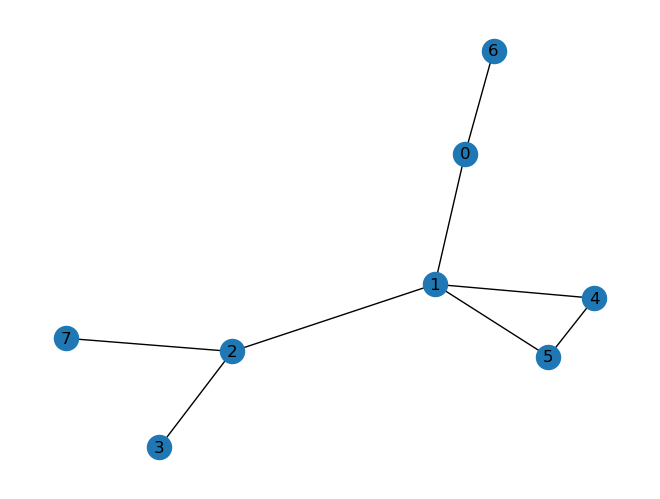

In [4]:
N = 8
g = GraphModel()

for i in range(g.get_node_count(), N):
  g.add_new_node_by_model()

g.draw_graph()

In [5]:
probabilities = g.calculate_probabilities()

for node_index in range(0, g.get_node_count()):
    print(f'Node {node_index}: Degree {len(g.get_graph()[node_index])} - Probability {probabilities[node_index]}')

Node 0: Degree 1 - Probability 0.1625
Node 1: Degree 2 - Probability 0.16249999999999998
Node 2: Degree 2 - Probability 0.2
Node 3: Degree 1 - Probability 0.14375
Node 4: Degree 2 - Probability 0.16249999999999998
Node 5: Degree 2 - Probability 0.16249999999999998
Node 6: Degree 1 - Probability 0.1625
Node 7: Degree 1 - Probability 0.14375


In [6]:
N = 8192
g = GraphModel()

for i in range(g.get_node_count(), N):
  g.add_new_node_by_model()

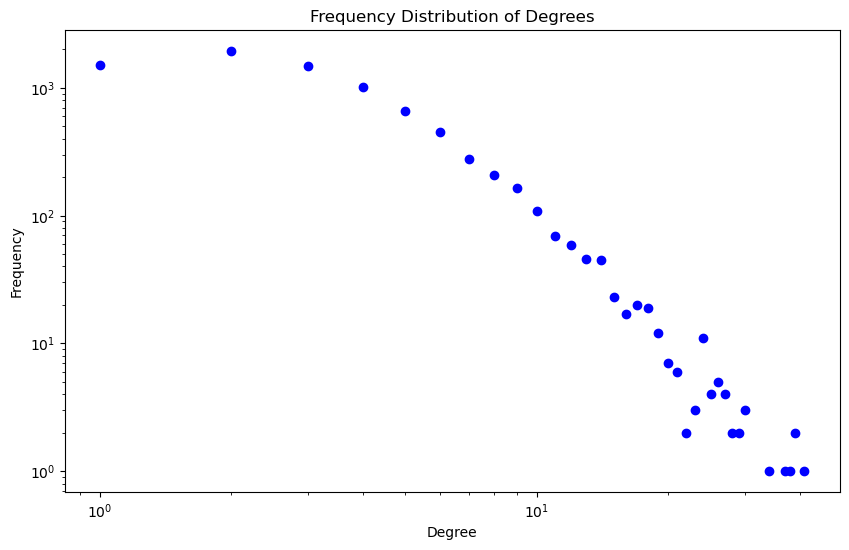

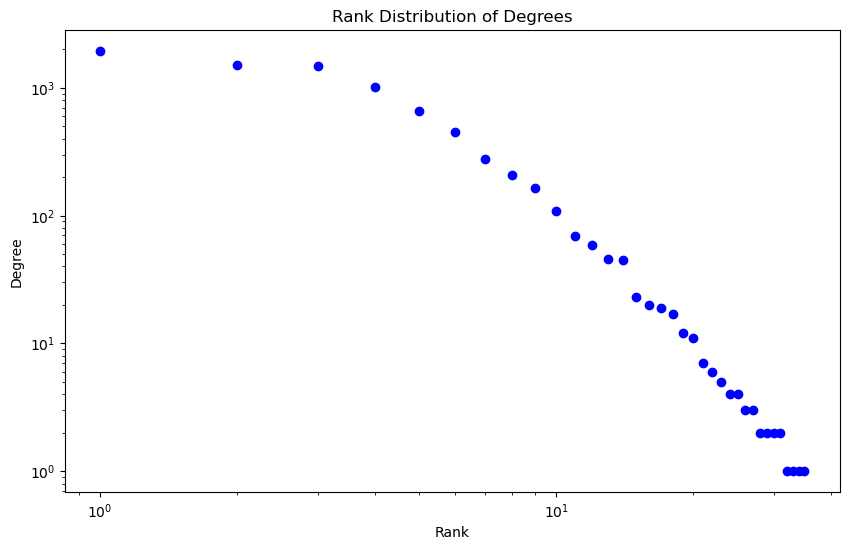

In [7]:
g.plot_frequency_distribution()
g.plot_rank_distribution()

In [8]:
freq_slope, rank_slope = g.calculate_scaling_coefficients()
print(f'Freq: {freq_slope}')
print(f'Rank: {rank_slope}')

Freq: -2.5725274293214992
Rank: -2.6461421443734094
